# DSI Summer Workshops Series

## June 21, 2018

Peggy Lindner<br>
Center for Advanced Computing & Data Science (CACDS)<br>
Data Science Institute (DSI)<br>
University of Houston  
plindner@uh.edu 


This tutorial is available at:
http://130.211.184.150/hub/login


## Computational Genomics with R

Basis understanding of Genomic Data Analysis using R

### Goals

* If you are not familiar with R, you will get the basics of R and divide right in to specialized uses of R for computational genomics.
* You will understand genomic intervals and operations on them, such as overlap
* You will be able to retrieve data and explore it



![](Images/DataAnalysis.png)

## Some R Basics 
### Packages and functions

In [ ]:
library(stats)
ls("package:stats") # functions in the package
ls() # objects in your R enviroment

In [ ]:
# get help on hist() function
?hist
help("hist")
# search the word "hist" in help pages
help.search("hist")
??hist

### Basic Computations in R

In [ ]:
2 + 3 * 5       # Note the order of operations.
log(10)        # Natural logarithm with base e
5^2            # 5 raised to the second power
3/2            # Division
sqrt(16)      # Square root
abs(3-7)      # Absolute value of 3-7
pi             # The number
exp(2)        # exponential function
# This is a comment line

### Data Structures
#### Vectors

In [ ]:
x <- c(1, 3, 2, 10, 5)  #create a vector x with 5 components
x
## [1]  1  3  2 10  5
y <- 1:5  #create a vector of consecutive integers y
y + 2  #scalar addition
## [1] 3 4 5 6 7
2 * y  #scalar multiplication
## [1]  2  4  6  8 10
y^2  #raise each component to the second power
## [1]  1  4  9 16 25
2^y  #raise 2 to the first through fifth power
## [1]  2  4  8 16 32
y  #y itself has not been unchanged
## [1] 1 2 3 4 5
y <- y * 2
y  #it is now changed
## [1]  2  4  6  8 10
r1 <- rep(1, 3)  # create a vector of 1s, length 3
length(r1)  #length of the vector
## [1] 3
class(r1)  # class of the vector
## [1] "numeric"
a <- 1  # this is actually a vector length one

#### Matrix

In [ ]:
x <- c(1, 2, 3, 4)
y <- c(4, 5, 6, 7)
m1 <- cbind(x, y)
m1
##      x y
## [1,] 1 4
## [2,] 2 5
## [3,] 3 6
## [4,] 4 7
t(m1)  # transpose of m1
##   [,1] [,2] [,3] [,4]
## x    1    2    3    4
## y    4    5    6    7
dim(m1)  # 2 by 5 matrix
## [1] 4 2

#### Data Frames

In [ ]:
chr <- c("chr1", "chr1", "chr2", "chr2")
strand <- c("-","-","+","+")
start<- c(200,4000,100,400)
end<-c(250,410,200,450)
mydata <- data.frame(chr,start,end,strand)
#change column names
names(mydata) <- c("chr","start","end","strand")
mydata # OR this will work too
mydata <- data.frame(chr=chr,start=start,end=end,strand=strand)
mydata

#### Slicing and Dicing

![](Images/slicingDataFrames.png)

In [ ]:
mydata[,2:4] # columns 2,3,4 of data frame
mydata[,c("chr","start")] # columns chr and start from data frame
mydata$start # variable start in the data frame
mydata[c(1,3),] # get 1st and 3rd rows
mydata[mydata$start>400,] # get all rows where start>400


#### List

In [ ]:
# example of a list with 4 components
# a string, a numeric vector, a matrix, and a scalar
w <- list(name="Fred",
       mynumbers=c(1,2,3),
       mymatrix=matrix(1:4,ncol=2),
       age=5.3)
w

In [ ]:
w[[3]] # 3rd component of the list
w[["mynumbers"]] # component named mynumbers in list
w$age

#### Factors

In [ ]:
features=c("promoter","exon","intron")
f.feat=factor(features)

### Data types
 * numeric
 * logical
 * character
 * integer

In [ ]:
#create a numeric vector x with 5 components
x<-c(1,3,2,10,5)
x
#create a logical vector x
x<-c(TRUE,FALSE,TRUE)
x
# create a character vector
x<-c("sds","sd","as")
x
class(x)
# create an integer vector
x<-c(1L,2L,3L)
x
class(x)

### Reading and Writing Data

Most of the genomics data sets are in the form of genomic intervals associated with a score. That means mostly the data will be in table format with columns denoting chromosome, start positions, end positions, strand and score. One of the popular formats is BED format used primarily by UCSC genome browser but most other genome browsers and tools will support BED format. We have all the annotation data in BED format. In R, you can easily read tabular format data with read.table() function.

In [ ]:
enh.df <- read.table("data/subset.enhancers.hg18.bed", header = FALSE)  # read enhancer marker BED file
cpgi.df <- read.table("data/subset.cpgi.hg18.bed", header = FALSE) # read CpG island BED file
# check first lines to see how the data looks like
head(enh.df)
head(cpgi.df)

In [ ]:
write.table(cpgi.df,file="cpgi.txt",quote=FALSE,
            row.names=FALSE,col.names=FALSE,sep="\t")

In [ ]:
save(cpgi.df,enh.df,file="mydata.RData")
load("mydata.RData")
# saveRDS() can save one object at a type
saveRDS(cpgi.df,file="cpgi.rds")
x=readRDS("cpgi.rds")
head(x)

One important thing is that with save() you can save many objects at a time and when they are loaded into memory with load() they retain their variable names. For example, in the above code when you use load("mydata.RData") in a fresh R session, an object names “cpg.df” will be created. That means you have to figure out what name you gave it to the objects before saving them. On the contrary to that, when you save an object by saveRDS() and read by readRDS() the name of the object is not retained, you need to assign the output of readRDS() to a new variable (“x” in the above code chunk).

### Plotting in R
Let us sample 50 values from normal distribution and do some plots.

In [ ]:
# setting figure size in notebook
options(repr.plot.width = 4, repr.plot.height = 4)
# sample 50 values from normal distribution
# and store them in vector x
x<-rnorm(50)
hist(x) # plot the histogram of those values

In [ ]:
#let's add a title and change the color
hist(x,main="Hello histogram!!!",col="red")

#### Scatterplot

In [ ]:
# randomly sample 50 points from normal distribution
y<-rnorm(50)
#plot a scatter plot
# control x-axis and y-axis labels
plot(x,y,main="scatterplot of random samples",
        ylab="y values",xlab="x values")

#### Boxplot

lowerWhisker=Q1-1.5[IQR] and upperWhisker=Q1+1.5*[IQR]

In addition, outliers can be depicted as dots. In this case, outliers are the values that remain outside the whiskers.

In [ ]:
 boxplot(x,y,main="boxplots of random samples")

#### Barplot

In [ ]:
perc=c(50,70,35,25)
barplot(height=perc,names.arg=c("CpGi","exon","CpGi","exon"),
        ylab="percentages",main="imagine %s",
        col=c("red","red","blue","blue"))
legend("topright",legend=c("test","control"),fill=c("red","blue"))

 ## Saving plots
 If you want to save your plots to an image file there are couple of ways of doing that. Normally, you will have to do the following:
 1. Open a graphics device
 2. Create the plot
 3. Close the graphics device

In [ ]:
pdf("myplot.pdf",width=5,height=5)
plot(x,y)
dev.off()

 #Alternatively, you can first create the plot then copy the plot to a graphic device.

plot(x,y)
dev.copy(pdf,"myplot.pdf",width=7,height=5)
dev.off()

### Working with sequences, primarily DNA sequences, and genomic features.

We will be using Bioconductor packages for this. 

Bioconductor represents a different strand of current development in R, separate from the Hadley Wickham tidyverse. Where Hadley emphasizes the data frame above all else, Bioconductor uses a great variety of data types. It's the very opposite of tidy!

Nevertheless, Bioconductor is overwhelmingly *comprehensive*, and represents the most complete environment available for working with bioinformatic data currently available.

Bioconductor packages usually have useful documentation in the form of "vignettes". These are readable on the Bioconductor website, or within R:

In [1]:
source("http://bioconductor.org/biocLite.R")


The downloaded binary packages are in
	/var/folders/jw/knt_b30n31xgtwmrfn00sctm0000gn/T//RtmpUnNe9t/downloaded_packages


Bioconductor version 3.7 (BiocInstaller 1.30.0), ?biocLite for help


In [2]:
# Install a basic set of packages
biocLite()

# Install further packages used in this tutorial
biocLite(c(
    "Biostrings",
    "GenomicRanges", 
    "rtracklayer",
    "motifRG",
    "AnnotationHub",
    "ggbio"
))

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.0 (2018-04-23).
Installing package(s) ‘Biobase’, ‘IRanges’, ‘AnnotationDbi’
also installing the dependencies ‘bit’, ‘prettyunits’, ‘bit64’, ‘blob’, ‘BiocGenerics’, ‘S4Vectors’, ‘RSQLite’




The downloaded binary packages are in
	/var/folders/jw/knt_b30n31xgtwmrfn00sctm0000gn/T//RtmpUnNe9t/downloaded_packages


Old packages: 'highr', 'httpuv', 'MASS', 'mgcv', 'munsell', 'pillar', 'purrr',
  'recommenderlab', 'rlang', 'rmarkdown', 'stringi', 'survival', 'tm', 'xlsx'
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.0 (2018-04-23).
Installing package(s) ‘Biostrings’, ‘GenomicRanges’, ‘rtracklayer’, ‘motifRG’,
  ‘AnnotationHub’, ‘ggbio’
also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘futile.logger’, ‘snow’, ‘checkmate’, ‘matrixStats’, ‘GenomeInfoDbData’, ‘BiocParallel’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘htmlTable’, ‘DelayedArray’, ‘biomaRt’, ‘graph’, ‘RBGL’, ‘progress’, ‘reshape’, ‘ProtGenerics’, ‘XVector’, ‘GenomeInfoDb’, ‘XML’, ‘zlibbioc’, ‘Rsamtools’, ‘GenomicAlignments’, ‘seqLogo’, ‘BSgenome’, ‘BSgenome.Hsapiens.UCSC.hg19’, ‘interactiveDisplayBase’, ‘Hmisc’, ‘biovizBase’, ‘SummarizedExperiment’, ‘VariantAnnotation’, ‘GenomicFeatures’, ‘OrganismDbi’, ‘GGally’, ‘ensembldb’, ‘AnnotationFilter’




The downloaded binary packages are in
	/var/folders/jw/knt_b30n31xgtwmrfn00sctm0000gn/T//RtmpUnNe9t/downloaded_packages


installing the source packages ‘GenomeInfoDbData’, ‘BSgenome.Hsapiens.UCSC.hg19’

Old packages: 'highr', 'httpuv', 'MASS', 'mgcv', 'munsell', 'pillar', 'purrr',
  'recommenderlab', 'rlang', 'rmarkdown', 'stringi', 'survival', 'tm', 'xlsx'


In [3]:
library(Biostrings)     # Provides DNAString, DNAStringSet, etc
library(GenomicRanges)  # Provides GRanges, etc
library(rtracklayer)    # Provides import() and export()

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, which.min

Loading required package: S4Vectors
Loading required package: s

#### DNAString

Package `Biostrings` offers classes for storing DNA strings, `DNAString`, amino acid sequences, `AAString`, or anything else in a `BString`. These are very like character strings, but a variety of biologically meaningful functions can be applied to them.

In [4]:
myseq <- DNAString("ACCATTGATTAT")
myseq

  12-letter "DNAString" instance
seq: ACCATTGATTAT

In [5]:
class(myseq)

[1] "DNAString"
attr(,"package")
[1] "Biostrings"

In [6]:
reverseComplement(myseq)
translate(myseq)

  12-letter "DNAString" instance
seq: ATAATCAATGGT

  4-letter "AAString" instance
seq: TIDY

In [7]:
subseq(myseq, 3,5)
myseq[3:5]

  3-letter "DNAString" instance
seq: CAT

  3-letter "DNAString" instance
seq: CAT

In [ ]:
as.character(myseq)

In [ ]:
methods(class="DNAString")

In [ ]:
?"DNAString-class"

#### DNAStringSet

Often we want to work with a list of sequences, such as chromosomes.

In [ ]:
myset <- DNAStringSet( list(chrI=myseq, chrII=DNAString("ACGTACGT")) )
myset

# A DNAStringSet is list-like
myset$chrII
# or myset[["chrII"]]
# or myset[[2]]

#### Loading files

Loading sequences

DNA sequences are generally stored in FASTA format, a simple text format. These can be loaded with `readDNAStringSet` from `Biostrings`. Let's load the genome of E. coli strain K-12, obtained from the Ensembl FTP site.

```
### The start of the .fa file looks like this:
# >Chromosome dna:chromosome chromosome:GCA_000800765.1:Chromosome:1:4558660:1
# AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTC
# TGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGG
# TCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTAC
# ACAACATCCATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGT
# AACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAGCCCGCACCTGACAGTGCGGG
# CTTTTTTTTTCGACCAAAGGTAACGAGGTAACAACCATGCGAGTGTTGAAGTTCGGCGGT
# ...
```

In [21]:
seqs <- readDNAStringSet("gendata/Escherichia_coli_k_12.GCA_000800765.1.29.dna.genome.fa")
seqs

  A DNAStringSet instance of length 1
      width seq                                             names               
[1] 4558660 AGCTTTTCATTCTGACTGCAAC...AACGCCTTAGTAAGTATTTTTC Chromosome dna:ch...

In [22]:
# Our chromosome name is too verbose.
# Remove everything from the name after the first space.
names(seqs)
names(seqs) <- sub(" .*","",names(seqs))
names(seqs)

[1] "Chromosome dna:chromosome chromosome:GCA_000800765.1:Chromosome:1:4558660:1"

[1] "Chromosome"

#### Genomic Intervals


[Bioconductor](http://bioconductor.org) project has a dedicated package called **GenomicRanges** to deal with genomic intervals. In this section, we will provide use cases involving operations on genomic intervals. The main reason we will stick to this package is that it provides tools to do overlap operations. However package requires that users operate on specific data types that are conceptually similar to a tabular data structure implemented in a way that makes overlapping and related operations easier. The main object we will be using is called GRanges object and we will also see some other related objects from the GenomicRanges package.

#### How to create and manipulate a GRanges object

In [ ]:

gr=GRanges(seqnames=c("chr1","chr2","chr2"),
           ranges=IRanges(start=c(50,150,200),end=c(100,200,300)),
           strand=c("+","-","-")
)
gr

In [ ]:
# subset like a data frame
gr[1:2,]

In [ ]:
gr=GRanges(seqnames=c("chr1","chr2","chr2"),
           ranges=IRanges(start=c(50,150,200),end=c(100,200,300)),
           names=c("id1","id3","id2"),
           scores=c(100,90,50)
)
# or add it later (replaces the existing meta data)
mcols(gr)=DataFrame(name2=c("pax6","meis1","zic4"),
                    score2=c(1,2,3))

gr=GRanges(seqnames=c("chr1","chr2","chr2"),
           ranges=IRanges(start=c(50,150,200),end=c(100,200,300)),
           names=c("id1","id3","id2"),
           scores=c(100,90,50)
)

# or appends to existing meta data
mcols(gr)=cbind(mcols(gr),
                          DataFrame(name2=c("pax6","meis1","zic4")) )
gr

In [ ]:
# elementMetadata() and values() do the same things
elementMetadata(gr)

In [ ]:
values(gr)

#### Getting genomic regions into R as GRanges objects

There are multiple ways you can read in your genomic features into R and create a GRanges object. Most genomic interval data comes as a tabular format that has the basic information about the location of the interval and some other information. We already showed how to read BED files as data frame. Now we will show how to convert it to GRanges object.

In [ ]:
# read CpGi data set
cpgi.df = read.table("data/cpgi.hg19.chr21.bed", header = FALSE,
                     stringsAsFactors=FALSE) 
# remove chr names with "_"
cpgi.df =cpgi.df [grep("_",cpgi.df[,1],invert=TRUE),]

cpgi.gr=GRanges(seqnames=cpgi.df[,1],
                ranges=IRanges(start=cpgi.df[,2],
                              end=cpgi.df[,3]))

cpgi.gr

Sometimes pre-processing is necessary

In [ ]:
# read refseq file
ref.df = read.table("data/refseq.hg19.chr21.bed", header = FALSE,
                     stringsAsFactors=FALSE) 
ref.gr=GRanges(seqnames=ref.df[,1],
               ranges=IRanges(start=ref.df[,2],
                              end=ref.df[,3]),
               strand=ref.df[,6],name=ref.df[,4])
# get TSS
tss.gr=ref.gr
# end of the + strand genes must be equalized to start pos
end(tss.gr[strand(tss.gr)=="+",])  =start(tss.gr[strand(tss.gr)=="+",])
# startof the - strand genes must be equalized to end pos
start(tss.gr[strand(tss.gr)=="-",])=end(tss.gr[strand(tss.gr)=="-",])
# remove duplicated TSSes ie alternative transcripts
# this keeps the first instance and removes duplicates
tss.gr=tss.gr[!duplicated(tss.gr),]

Reading the genomic features as text files and converting to GRanges is not the only way to create GRanges object. With the help of rtracklayer package we can directly import.

In [ ]:
import.bed("data/refseq.hg19.chr21.bed")

Now we will show how to use other packages to automatically obtain the data in GRanges format. But you will not be able to use these methods for every data set so it is good to now how to read data from flat files as well. First, we will use rtracklayer package to download data from UCSC browser. We will download CpG islands as GRanges objects.

In [ ]:
session <- browserSession()
genome(session) <- "mm9"
## choose CpG island track on chr12
query <- ucscTableQuery(session, track="CpG Islands",table="cpgIslandExt",
        range=GRangesForUCSCGenome("mm9", "chr12"))
## get the GRanges object for the track
track(query)

### Finding regions that (does/does not) overlap with another set of regions

This is one of the most common tasks in genomics. Usually, you have a set of regions that you are interested in and you want to see if they overlap with another set of regions or see how many of them overlap. A good example is transcription factor binding sites determined by ChIP-seq experiments. In these types of experiments and followed analysis, one usually ends up with genomic regions that are bound by transcription factors. One of the standard next questions would be to annotate binding sites with genomic annotations such as promoter,exon,intron and/or CpG islands. Below is a demonstration of how transcription factor binding sites can be annotated using CpG islands. First, we will get the subset of binding sites that overlap with the CpG islands. In this case, binding sites are ChIP-seq peaks.

We can find the subset of peaks that overlap with the CpG islands using subsetByoverlaps() function. You will also see another way of converting data frames to GRanges.

In [ ]:
pk1=read.table("data/wgEncodeHaibTfbsGm12878Sp1Pcr1xPkRep1.broadPeak.gz")
head(pk1)

In [ ]:
# convert data frame to GRanges
pk1.gr=makeGRangesFromDataFrame(pk1,
        seqnames.field=c("V1"),
        start.field=c("V2"),
        end.field=c("V3"))
# only peaks on chr21
pk1.gr=pk1.gr[seqnames(pk1.gr)=="chr21",]
# get the peaks that overlap with CpG
# islands
subsetByOverlaps(pk1.gr,cpgi.gr)

For each CpG island, we can count the number of peaks that overlap with a given CpG island with countOverlaps().

In [ ]:
#count the peaks that
# overlap with CpG islands
counts=countOverlaps(pk1.gr,cpgi.gr)
head(counts)

findOverlaps() function can be used to see one-to-one overlaps between peaks and CpG islands. It returns a matrix showing which peak overlaps with which CpGi island.

In [ ]:
findOverlaps(pk1.gr,cpgi.gr)

Another interesting thing would be to look at the distances to nearest CpG islands for each peak. In addition, just finding the nearest CpG island could also be interesting. Often times, you will need to find nearest TSS or gene to your regions of interest, and the code below is handy for doing that.

In [ ]:
# find nearest CpGi to each TSS
n.ind=nearest(pk1.gr,cpgi.gr)
# get distance to nearest
dists=distanceToNearest(pk1.gr,cpgi.gr,select="arbitrary")
dists

### Some Visualizations: 

In [ ]:
# histogram of the distances to nearest TSS
dist2plot=mcols(dists)[,1]
hist(log10(dist2plot),xlab="log10(dist to nearest TSS)",
     main="Distances")

#### Tracks - aligning plots along chromosomes

Need specific help about ggbio? try mailing 
 the maintainer or visit http://tengfei.github.com/ggbio/

Attaching package: 'ggbio'

The following objects are masked from 'package:ggplot2':

    geom_bar, geom_rect, geom_segment, ggsave, stat_bin, stat_identity,
    xlim



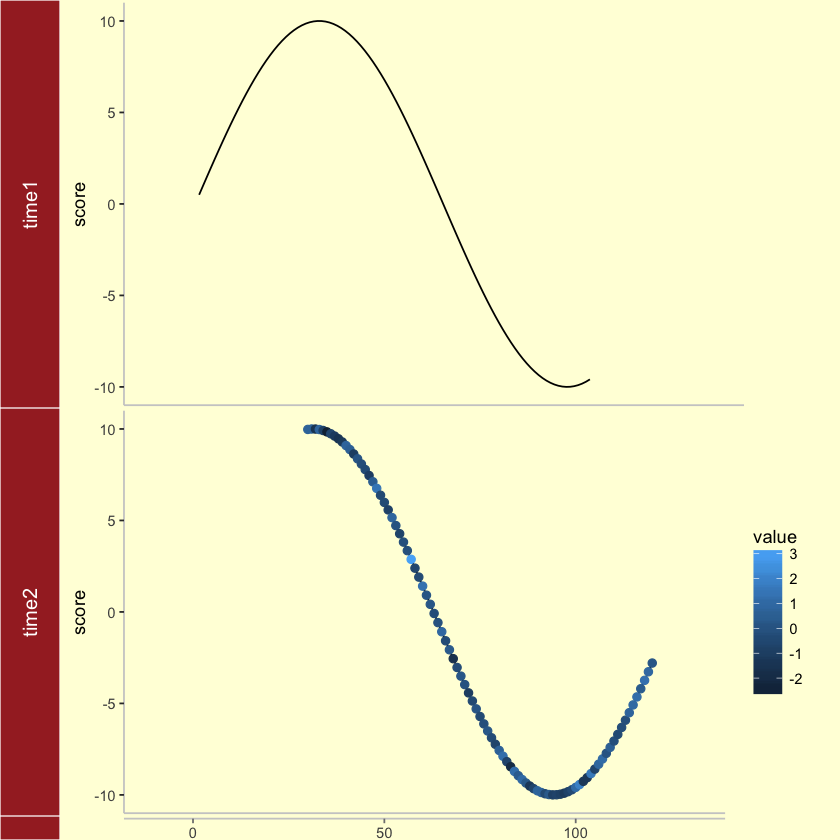

In [8]:
library(ggbio)
df1 <- data.frame(time = 1:100, score = sin((1:100)/20)*10)
p1 <- qplot(data = df1, x = time, y = score, geom = "line")
df2 <- data.frame(time = 30:120, score = sin((30:120)/20)*10, value = rnorm(120-30 +1))
p2 <- ggplot(data = df2, aes(x = time, y = score)) + geom_line() + geom_point(size = 2, aes(color = value))
tracks(time1 = p1, time2 = p2) + xlim(1, 40) + theme_tracks_sunset()

#### Plotting genomic ranges
GRanges objects are essential for storing alignment or annotation ranges in R/Bioconductor. The following creates a sample GRanges object and plots its content.

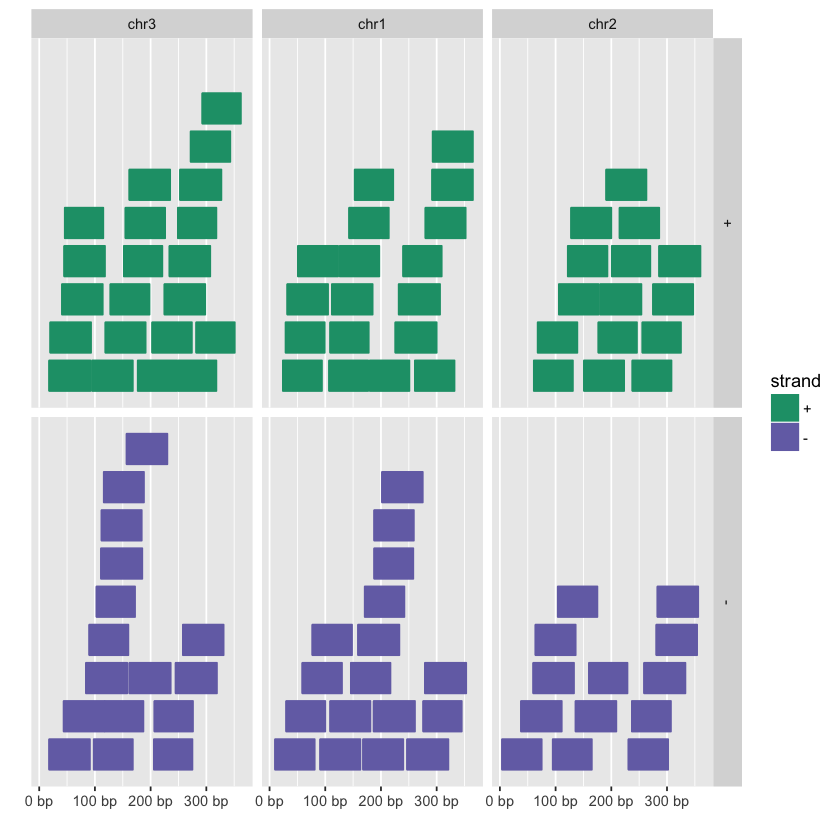

In [9]:
set.seed(1); N <- 100; gr <- GRanges(seqnames = sample(c("chr1", "chr2", "chr3"), size = N, replace = TRUE), IRanges(start = sample(1:300, size = N, replace = TRUE), width = sample(70:75, size = N,replace = TRUE)), strand = sample(c("+", "-"), size = N, replace = TRUE), value = rnorm(N, 10, 3), score = rnorm(N, 100, 30), sample = sample(c("Normal", "Tumor"), size = N, replace = TRUE), pair = sample(letters, size = N, replace = TRUE))
autoplot(gr, aes(color = strand, fill = strand), facets = strand ~ seqnames)

#### Plotting coverage

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


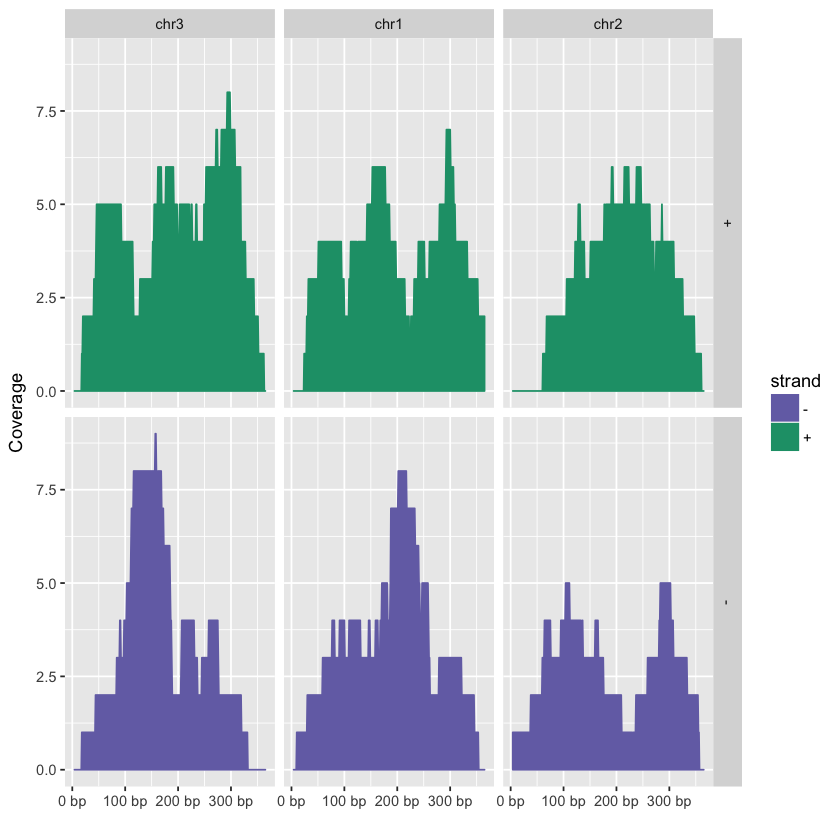

In [10]:
autoplot(gr, aes(color = strand, fill = strand), facets = strand ~ seqnames, stat = "coverage")

#### Mirrored coverage

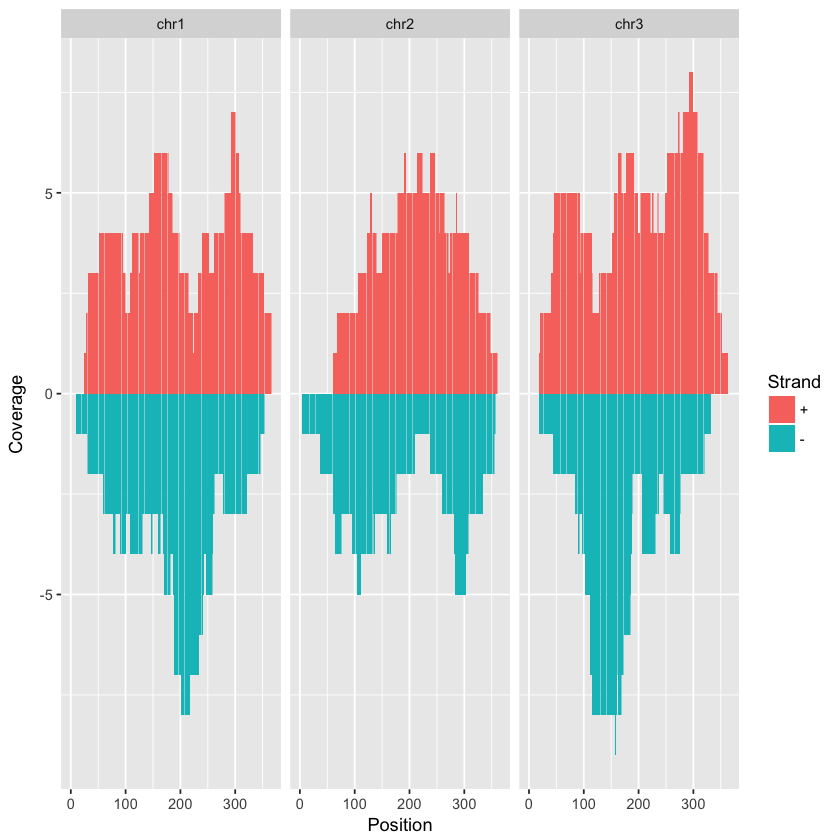

In [11]:
pos <- sapply(coverage(gr[strand(gr)=="+"]), as.numeric)
pos <- data.frame(Chr=rep(names(pos), sapply(pos, length)), Strand=rep("+", length(unlist(pos))), Position=unlist(sapply(pos, function(x) 1:length(x))), Coverage=as.numeric(unlist(pos)))
neg <- sapply(coverage(gr[strand(gr)=="-"]), as.numeric)
neg <- data.frame(Chr=rep(names(neg), sapply(neg, length)), Strand=rep("-", length(unlist(neg))), Position=unlist(sapply(neg, function(x) 1:length(x))), Coverage=-as.numeric(unlist(neg)))
covdf <- rbind(pos, neg)
p <- ggplot(covdf, aes(Position, Coverage, fill=Strand)) + 
	    geom_bar(stat="identity", position="identity") + facet_wrap(~Chr)
p

#### Circular genome plots

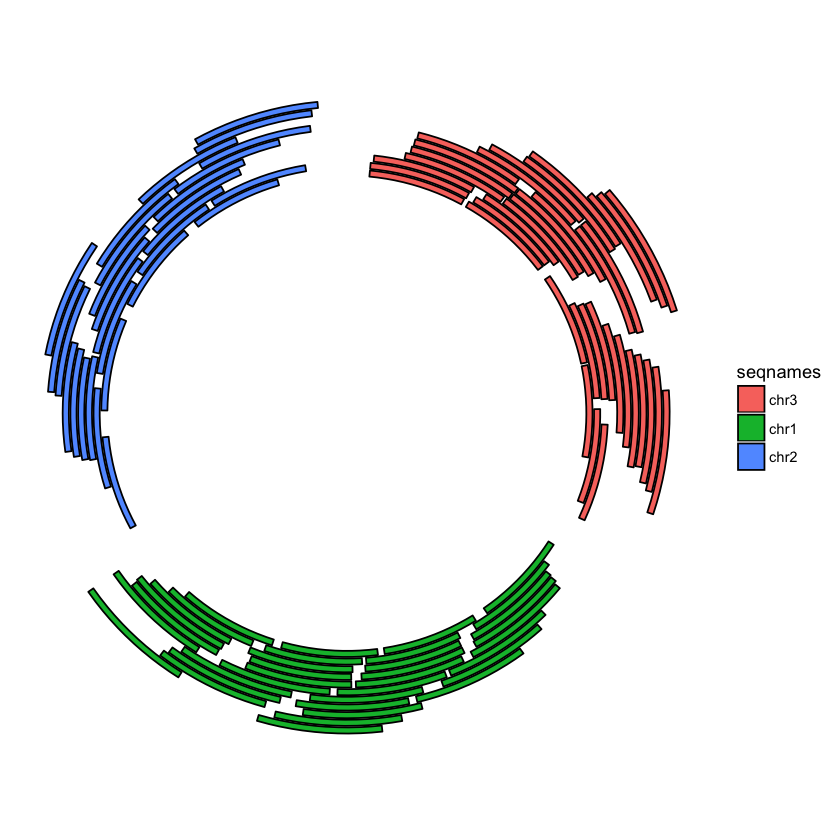

In [12]:
 ggplot(gr) + layout_circle(aes(fill = seqnames), geom = "rect")

More complex circular example

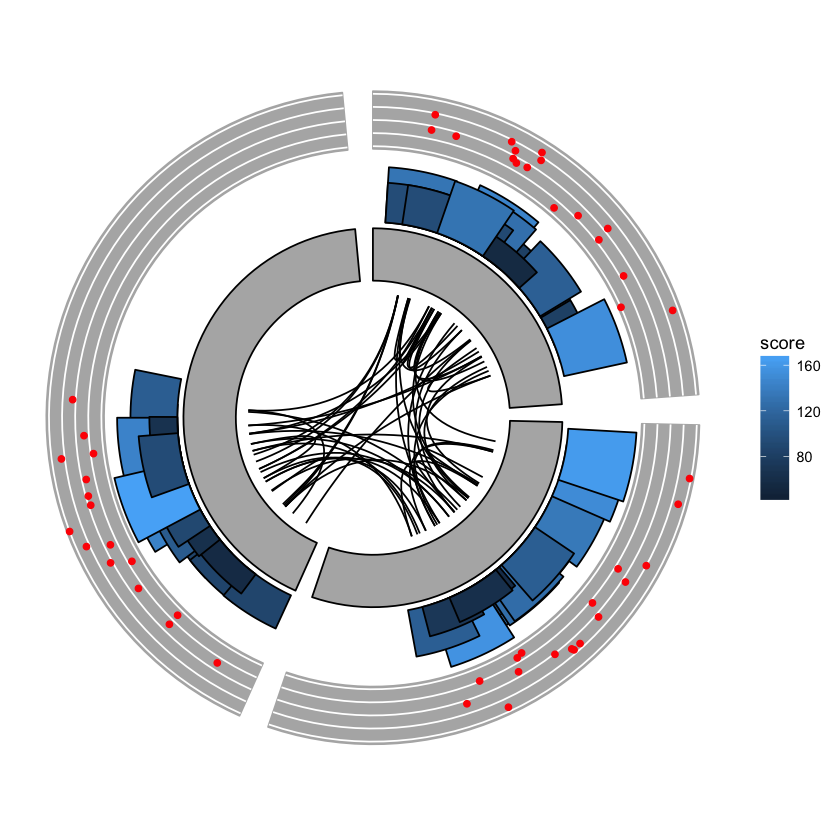

In [13]:
seqlengths(gr) <- c(400, 500, 700)
values(gr)$to.gr <- gr[sample(1:length(gr), size = length(gr))]
idx <- sample(1:length(gr), size = 50)
gr <- gr[idx]
ggplot() + layout_circle(gr, geom = "ideo", fill = "gray70", radius = 7, trackWidth = 3) +
  layout_circle(gr, geom = "bar", radius = 10, trackWidth = 4,
                aes(fill = score, y = score)) +
  layout_circle(gr, geom = "point", color = "red", radius = 14,
                trackWidth = 3, grid = TRUE, aes(y = score)) +
  layout_circle(gr, geom = "link", linked.to = "to.gr", radius = 6, trackWidth = 1)

#### Alignments and variants plot


Loading required package: AnnotationDbi
Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.

Loading required package: SummarizedExperiment
Loading required package: DelayedArray
Loading required package: matrixStats

Attaching package: 'matrixStats'

The following objects are masked from 'package:Biobase':

    anyMissing, rowMedians

Loading required package: BiocParallel

Attaching package: 'DelayedArray'

The following objects are masked from 'package:matrixStats':

    colMaxs, colMins, colRanges, rowMaxs, rowMins, rowRanges

The following object is masked from 'package:Biostrings':

    type

The following objects are masked from 'package:base':

    aperm, apply


Attaching package: 'VariantAnnotation'

The following object is masked from 'package:base':

    tabulate

extracting information...
extract

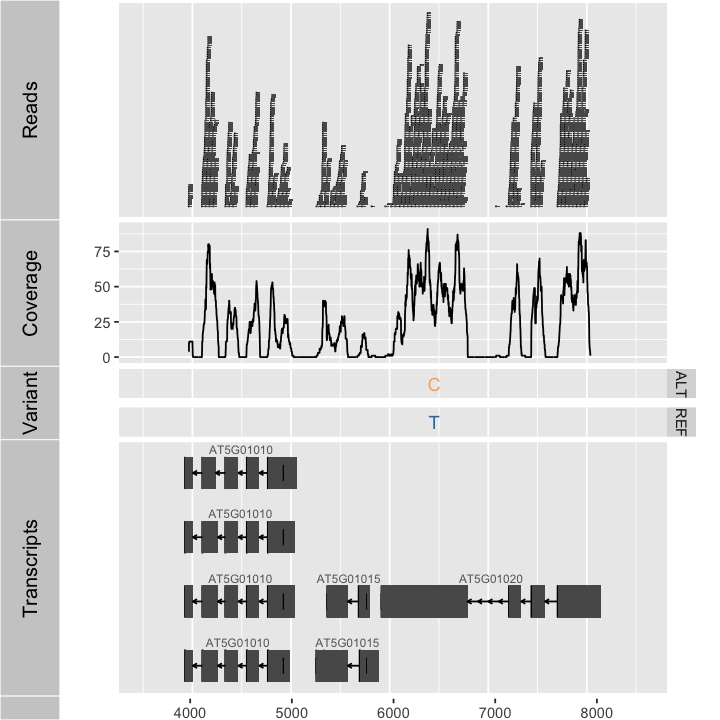

In [14]:
library(rtracklayer); library(GenomicFeatures); library(Rsamtools); library(GenomicAlignments); library(VariantAnnotation)

options(repr.plot.width = 6, repr.plot.height = 6)
ga <- readGAlignments("plotdata/SRR064167.fastq.bam", use.names=TRUE, param=ScanBamParam(which=GRanges("Chr5", IRanges(4000, 8000))))
p1 <- autoplot(ga, geom = "rect")
p2 <- autoplot(ga, geom = "line", stat = "coverage")
vcf <- readVcf(file="plotdata/varianttools_gnsap.vcf", genome="ATH1")
p3 <- autoplot(vcf[seqnames(vcf)=="Chr5"], type = "fixed") + xlim(4000, 8000) + theme(legend.position = "none", axis.text.y = element_blank(), axis.ticks.y=element_blank())
txdb <- makeTxDbFromGFF(file="plotdata/TAIR10_GFF3_trunc.gff", format="gff3")
p4 <- autoplot(txdb, which=GRanges("Chr5", IRanges(4000, 8000)), names.expr = "gene_id")
tracks(Reads=p1, Coverage=p2, Variant=p3, Transcripts=p4, heights = c(0.3, 0.2, 0.1, 0.35)) + ylab("")

### Loading features

Genome annotations are available in a variety of text formats such as GFF3 and GTF. They can be loaded with the `import` function from `rtracklayer`. This GTF file is also from Ensembl, and gives the locations of the genes in the genome, and features within them.

```
### The start of the .gtf file looks like this:
# #!genome-build ASM80076v1
# #!genome-version GCA_000800765.1
# #!genome-date 2014-12
# #!genome-build-accession GCA_000800765.1
# #!genebuild-last-updated 2014-12
# Chromosome      ena     gene    190     255     .       +       .       gene_id "ER3413_4519"; gene_version "1"; gene_name "thrL"; gene_source "ena"; gene_biotype "protein_coding";
# Chromosome      ena     transcript      190     255     .       +       .       gene_id "ER3413_4519"; gene_version "1"; transcript_id "AIZ54182"; transcript_version "1"; gene_name "thrL"; gene_source "ena"; gene_biotype "protein_coding"; transcript_name "thrL-1"; transcript_source "ena"; transcript_biotype "protein_coding";
# Chromosome      ena     exon    190     255     .       +       .       gene_id "ER3413_4519"; gene_version "1"; transcript_id "AIZ54182"; transcript_version "1"; exon_number "1"; gene_name "thrL"; gene_source "ena"; gene_biotype "protein_coding"; transcript_name "thrL-1"; transcript_source "ena"; transcript_biotype "protein_coding"; exon_id "AIZ54182-1"; exon_version "1";
# Chromosome      ena     CDS     190     252     .       +       0       gene_id "ER3413_4519"; gene_version "1"; transcript_id "AIZ54182"; transcript_version "1"; exon_number "1"; gene_name "thrL"; gene_source "ena"; gene_biotype "protein_coding"; transcript_name "thrL-1"; transcript_source "ena"; transcript_biotype "protein_coding"; protein_id "AIZ54182"; protein_version "1";
# ...
```

In [15]:
features <- import("gendata/Escherichia_coli_k_12.GCA_000800765.1.29.gtf")

# Optional: just retain the columns of metadata we need
mcols(features) <- mcols(features)[,c("type","gene_name","gene_id")]

features

GRanges object with 24926 ranges and 3 metadata columns:
            seqnames          ranges strand |        type   gene_name
               <Rle>       <IRanges>  <Rle> |    <factor> <character>
      [1] Chromosome         190-255      + |        gene        thrL
      [2] Chromosome         190-255      + |  transcript        thrL
      [3] Chromosome         190-255      + |        exon        thrL
      [4] Chromosome         190-252      + |         CDS        thrL
      [5] Chromosome         190-192      + | start_codon        thrL
      ...        ...             ...    ... .         ...         ...
  [24922] Chromosome 4557950-4558636      + |  transcript        yjtD
  [24923] Chromosome 4557950-4558636      + |        exon        yjtD
  [24924] Chromosome 4557950-4558633      + |         CDS        yjtD
  [24925] Chromosome 4557950-4557952      + | start_codon        yjtD
  [24926] Chromosome 4558634-4558636      + |  stop_codon        yjtD
              gene_id
          <

We can use these annotations to grab sequences from the genome.

In [17]:
feat <- features[4,]
feat


GRanges object with 1 range and 3 metadata columns:
        seqnames    ranges strand |     type   gene_name     gene_id
           <Rle> <IRanges>  <Rle> | <factor> <character> <character>
  [1] Chromosome   190-252      + |      CDS        thrL ER3413_4519
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

The metadata columns let us query the GRanges, for example for a particular gene.

In [18]:
subset(features, gene_name == "lacA")
# Equivalently:
#   features[features$gene_name == "lacA" & !is.na(features$gene_name),]

GRanges object with 6 ranges and 3 metadata columns:
        seqnames        ranges strand |        type   gene_name     gene_id
           <Rle>     <IRanges>  <Rle> |    <factor> <character> <character>
  [1] Chromosome 363147-363758      - |        gene        lacA  ER3413_350
  [2] Chromosome 363147-363758      - |  transcript        lacA  ER3413_350
  [3] Chromosome 363147-363758      - |        exon        lacA  ER3413_350
  [4] Chromosome 363150-363758      - |         CDS        lacA  ER3413_350
  [5] Chromosome 363756-363758      - | start_codon        lacA  ER3413_350
  [6] Chromosome 363147-363149      - |  stop_codon        lacA  ER3413_350
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

Note: `subset` is a generic R function. It is also similar to dplyr's `filter`. The second argument is special, in it you can refer to columns of the GRanges directly.

We could also get all features of a particular type.

In [19]:
cds <- subset(features, type == "CDS")
cds
# Equivalently:
#   features[features$type == "CDS",]

GRanges object with 4052 ranges and 3 metadata columns:
           seqnames          ranges strand |     type   gene_name     gene_id
              <Rle>       <IRanges>  <Rle> | <factor> <character> <character>
     [1] Chromosome         190-252      + |      CDS        thrL ER3413_4519
     [2] Chromosome        337-2796      + |      CDS        thrA    ER3413_1
     [3] Chromosome       2801-3730      + |      CDS        thrB    ER3413_2
     [4] Chromosome       3734-5017      + |      CDS        thrC    ER3413_3
     [5] Chromosome       5234-5527      + |      CDS        yaaX    ER3413_4
     ...        ...             ...    ... .      ...         ...         ...
  [4048] Chromosome 4553704-4555125      + |      CDS        creC ER3413_4511
  [4049] Chromosome 4555186-4556535      + |      CDS        creD ER3413_4512
  [4050] Chromosome 4556601-4557314      - |      CDS        arcA ER3413_4513
  [4051] Chromosome 4557410-4557547      + |      CDS        yjjY ER3413_4541
  [4052]

#### Further data types to explore

**GRangesList, etc**: Many Bioconductor types have a List version -- `GRangesList`, `DNAStringSetList`, etc. For example the exons of a collection of genes could be naturally stored in a `GRangesList`. Most functions that work with `GRanges` will also worked with `GRangesList`, and operate on each list element separately.

**TxDb**: `TxDb` objects represent the hierarchy of genes which contain transcripts which contain exons and CDS (CoDing Sequence) ranges. `TxDb` objects are provided by the `GenomicFeatures` package.

**Seqinfo**: `GRanges` (and various other types) may have associated sequence information accessed with `seqinfo()`. This contains the names and lengths of the sequences the ranges may refer to, and whether they are circular. It allows for some error checking if present.

### Finding a known motif

AGGAGGU is the Shine-Dalgarno sequence, which assists binding of the ribosome to a transcript.

In [23]:
vmatchPattern("AGGAGGT", seqs)

MIndex object of length 1
$Chromosome
IRanges object with 63 ranges and 0 metadata columns:
           start       end     width
       <integer> <integer> <integer>
   [1]     56593     56599         7
   [2]     67347     67353         7
   [3]    226876    226882         7
   [4]    229408    229414         7
   [5]    241665    241671         7
   ...       ...       ...       ...
  [59]   4312631   4312637         7
  [60]   4371930   4371936         7
  [61]   4410503   4410509         7
  [62]   4420666   4420672         7
  [63]   4484025   4484031         7


`vmatchPattern` is strand specific. If we want matches on the reverse strand we need to also:

In [24]:
vmatchPattern(reverseComplement(DNAString("AGGAGGT")), seqs)

MIndex object of length 1
$Chromosome
IRanges object with 76 ranges and 0 metadata columns:
           start       end     width
       <integer> <integer> <integer>
   [1]     59133     59139         7
   [2]    125294    125300         7
   [3]    136473    136479         7
   [4]    226640    226646         7
   [5]    266770    266776         7
   ...       ...       ...       ...
  [72]   4139844   4139850         7
  [73]   4181244   4181250         7
  [74]   4241083   4241089         7
  [75]   4397026   4397032         7
  [76]   4473495   4473501         7


Demanding an exact match here is overly strict. `vmatchPattern` has arguments allowing inexact matches. Alternatively, there is a similar function for searching for a Position Weight Matrix pattern, `matchPWM`.

The following will search both strands, allowing one mismatch, and produce the result in convenient GRanges form:

In [25]:
query <- DNAString("AGGAGGT")
max.mismatch <- 1

fwd <- vmatchPattern(query, seqs, max.mismatch=max.mismatch)
fwd <- as(fwd, "GRanges")
strand(fwd) <- "+"
rev <- vmatchPattern(reverseComplement(query), seqs, max.mismatch=max.mismatch)
rev <- as(rev, "GRanges")
strand(rev) <- "-"

complete <- c(fwd, rev)
complete

# Write to GFF file
export(complete, "motif-matches.gff")

GRanges object with 7534 ranges and 0 metadata columns:
           seqnames          ranges strand
              <Rle>       <IRanges>  <Rle>
     [1] Chromosome         323-329      +
     [2] Chromosome       3540-3546      +
     [3] Chromosome       3765-3771      +
     [4] Chromosome       5374-5380      +
     [5] Chromosome       7641-7647      +
     ...        ...             ...    ...
  [7530] Chromosome 4550281-4550287      -
  [7531] Chromosome 4551603-4551609      -
  [7532] Chromosome 4551732-4551738      -
  [7533] Chromosome 4552223-4552229      -
  [7534] Chromosome 4552751-4552757      -
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

We might then view this in the IGV genome browser:

![](Images/igvbrowser.png)

[http://software.broadinstitute.org/software/igv/home]

# De novo motif finding


Let's try to "discover" the Shine-Dalgarno sequence for ourselves.

In [28]:
# Note: bacteria do not have introns
# In a eukaryote, you would need to merge CDS by transcript

size <- 30

initiation_regions <- flank(cds, size, start=TRUE)
initiation_seqs <- getSeq(seqs, initiation_regions)
names(initiation_seqs) <- initiation_regions$gene_id

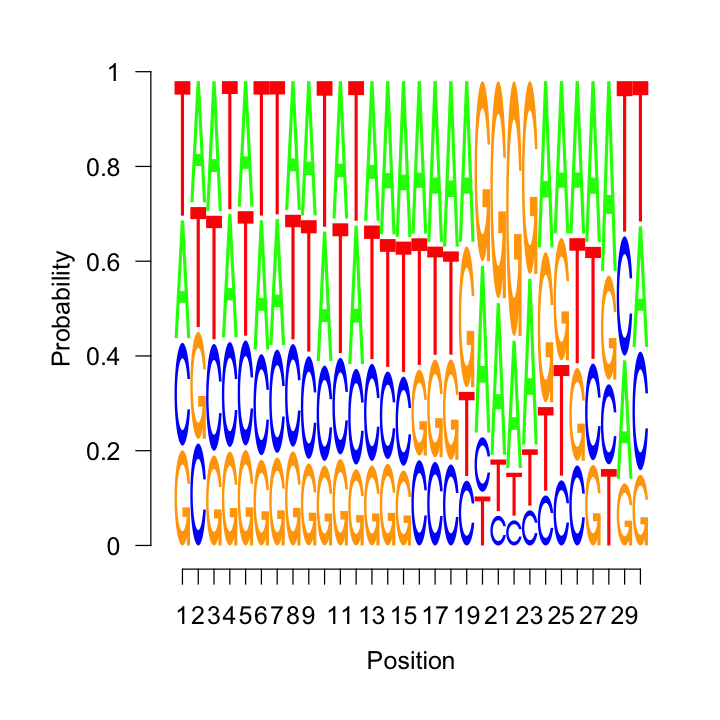

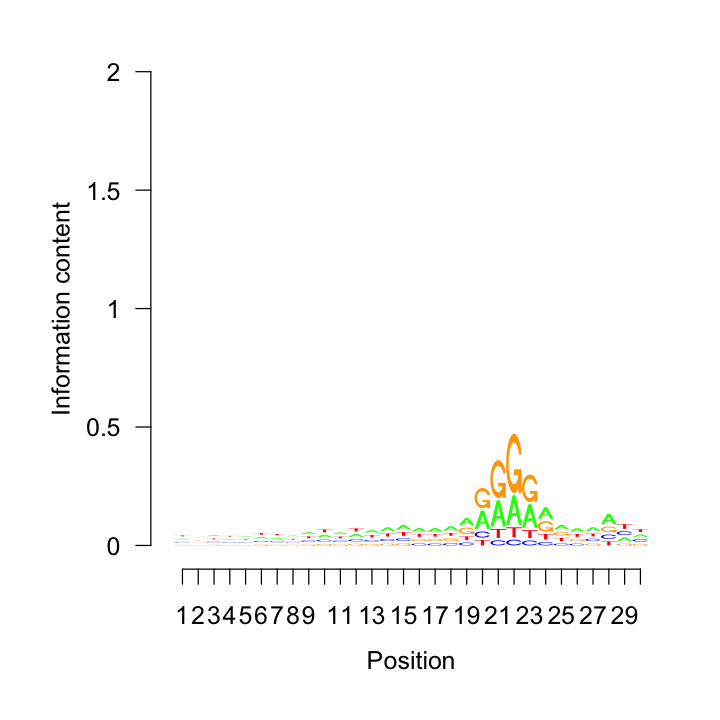

In [29]:
# Look for any composition bias
library(seqLogo)
letter_counts <- consensusMatrix(initiation_seqs)
probs <- prop.table(letter_counts[1:4,], 2)
seqLogo(probs, ic.scale=FALSE)
seqLogo(probs)

# Next steps

We've seen just the smallest part of what [Bioconductor](http://bioconductor.org/) has to offer in this space.

* [Most downloaded Bioconctor packages](http://bioconductor.org/packages/stats/)
* [Bioconductor cheat sheet](https://github.com/mikelove/bioc-refcard/blob/master/README.Rmd)
* [COMBINE Bioconductor course from May 2017](https://combine-australia.github.io/2017-05-19-bioconductor-melbourne/)
* [Bioconductor's Stack Overflow-style support site](https://support.bioconductor.org/)

Besides software, Bioconductor includes packages with data for model organisms, for example. The data is generally from these central repositories:

* NCBI's Entrez Gene gene database and Refseq reference sequences
* The EBI's Ensembl genome browser
* The UCSC genome browser

These organizations will generally obtain genome assemblies from the same ultimate sources. For example, all of the above use the Genome Reference Consortium's GRCh38 DNA sequence for homo sapiens. UCSC likes to call this "hg38" but it is the same DNA sequence. These DNA sequences serve as a common frame of reference. However the three organizations above will differ on their exact set of gene and transcript annotations, and all use a different gene and transcript ID system. These annotations are also revised more often than the underlying DNA sequences.

This mess is partly due to American/European rivalry, and partly due to differing goals. The UCSC genome browser has always been about practicality and showing many lines of evidence. The others are more concerned with careful curation and standardization.

Some example packages:

### BSgenome.Hsapiens.UCSC.hg38 

Biostrings genome, Homo sapiens, from the UCSC browser, version hg38.

DNA for chromosomes, usable in the same way as the DNAStringSet used above.

### TxDb.Hsapiens.UCSC.hg38.knownGene

Transcript database, Homo sapiens, from UCSC browser, genome verison hg38, "knownGene" gene annotations.

GRanges information for genes and transcripts, much as we loaded from a GTF file above.

### org.Hs.eg.db

Organism Homo sapiens, primary key is Entrez Gene, database.

Translation of gene ids from various databases, assignment to GO terms, KEGG pathways, etc. Entrez Gene ids are used as the primary key.

### biomaRt 

Access to BioMart data, on the internet -- translation of gene ids, gene sets, gene information, etc.

### AnnotationHub

AnnotationHub is a way to retrieve data from a more comprehensive set of organisms and data providers than the above styles of package. The retrieved data is returned in an appropriate Bioconductor type. If data is being updated over time (eg improved annotation of a genome), each version receives a unique ID in AnnotationHub, making it much easier to write reproducable analyses.

AnnotationHub also provides access to experimental data which maps to locations on a genome, similar to the sorts of tracks you would load in the UCSC browser.

Files are cached, so they will only be downloaded once.

In the example below, the yeast genome and annotations are retrieved:

In [ ]:
library(AnnotationHub)
ah <- AnnotationHub()

In [ ]:
# ah contains a large collection of records that can be retrieved
ah
length(ah)
colnames( mcols(ah) )
table( ah$rdataclass )

In [ ]:
# query() searches for terms in an unstructured way
records <- query(ah, c("Ensembl", "85", "Saccharomyces cerevisiae"))
records

In [ ]:
mcols(records)
mcols(records)[,c("title","rdataclass")]

In [ ]:
# Having located records of interest,
# your R script can refer to the specific AH... record,
# so it always uses the same version of the data.
ah[["AH51399"]]
sc_genome <- import( ah[["AH51399"]] )
sc_granges <- ah[["AH51088"]]

In [ ]:
# More recent versions of Bioconductor also allow you to
# retrieve TxDb (and similar EnsDb) objects.


query(ah, c("OrgDb", "Saccharomyces cerevisiae"))
sc_orgdb <- ah[["AH49589"]]

Tutorial based on input from:

https://al2na.github.io/compgenr/

https://monashbioinformaticsplatform.github.io/r-more/topics/sequences_and_features.html